In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the sales CSV file
df_sales = pd.read_csv('sales.csv')

# Read the products CSV file
df_products = pd.read_csv('products.csv')
df_regions = pd.read_csv('regions.csv')


In [5]:
df_sales_products = pd.merge(df_sales, df_products, on='product_id', how='left')

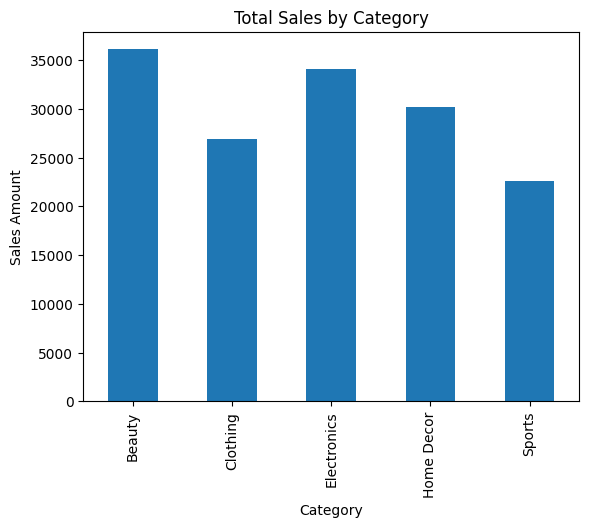

In [9]:
# bar chart of total sales by category over time
category_totals = df_sales_products.groupby('category')['sales_amount'].sum()
# plot bar chart
category_totals.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.show()


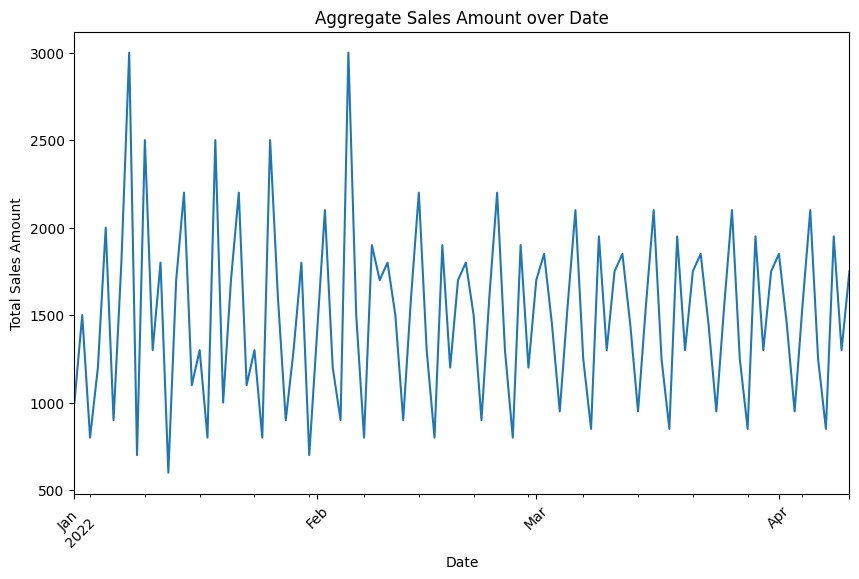

In [15]:
# Convert date column to datetime format
df_sales['date'] = pd.to_datetime(df_sales['date'],format='%d-%m-%Y')

# Group by date and calculate sum of sales_amount
aggregated_df = df_sales.groupby('date')['sales_amount'].sum()

# Plot the aggregated data using a line plot
plt.figure(figsize=(10,6))  # Increase the size of the plot
aggregated_df.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.title('Aggregate Sales Amount over Date')
plt.show()



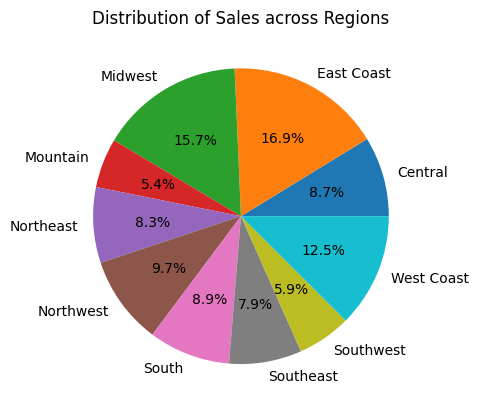

In [24]:
df_sales_regions = pd.merge(df_sales, df_regions, on='region_id', how='left')
df_sales_regions.groupby('region_name')['sales_amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sales across Regions')
plt.ylabel('')  # Remove the y-axis label
plt.show()


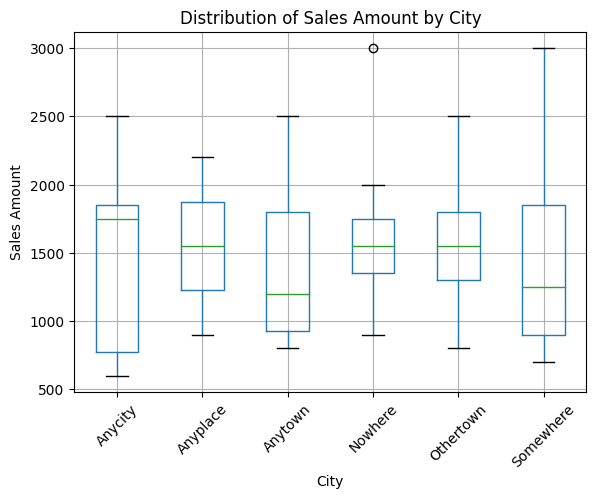

In [25]:
df_customers = pd.read_csv('customers.csv')
df_customers['city'] = df_customers['address'].str.split(',').str[-2].str.strip()
df_sales_customer = pd.merge(df_sales, df_customers, on='customer_id')

# create boxplot for each city to show the distribution of sales_amount
df_sales_customer.boxplot(column='sales_amount', by='city', rot=45)
plt.title('Distribution of Sales Amount by City')
plt.suptitle('')  # Remove the title that pandas automatically adds
plt.ylabel('Sales Amount')
plt.xlabel('City')
plt.show()